In [11]:
subject_name = "s6"

# Necessary lubrary
import mne
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
EEG_data_path = './Subject Data/%s' %subject_name.upper()

Extracting EDF parameters from /Users/jager/David MSc Project Analysis/Subject Data/S6/s6_raw.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3170303  =      0.000 ...  3095.999 secs...
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)


/var/folders/78/y067h6615hj5g0k136z_sp840000gn/T/ipykernel_5276/28753705.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(tmin=200, picks='eeg');#First glimpse at the coarse frequnecy composition of the data
/Users/jager/opt/miniforge3/envs/mne/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


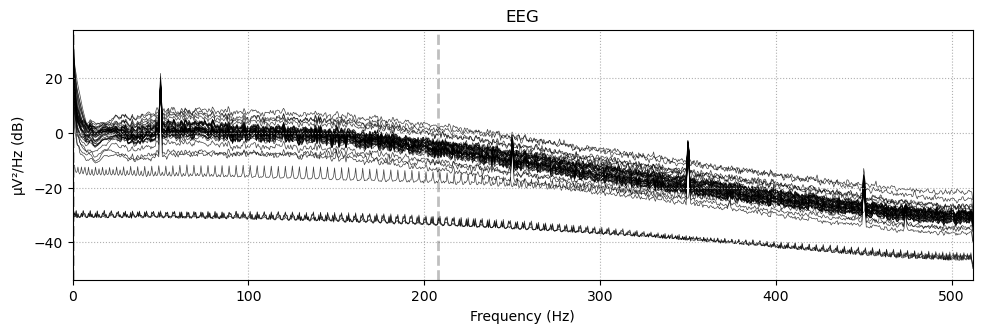

<Info | 7 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 41 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 208.0 Hz
 meas_date: 2024-07-10 15:26:18 UTC
 nchan: 42
 projs: []
 sfreq: 1024.0 Hz
>

In [12]:
raw = mne.io.read_raw_bdf('%s/%s_raw.bdf'%(EEG_data_path, subject_name),preload=True, verbose=True)
raw.plot_psd(tmin=200, picks='eeg');#First glimpse at the coarse frequnecy composition of the data
plt.show()
raw.info#Info structure about the data

In [13]:
raw.drop_channels(['EXG3','EXG7','EXG8'])# Empty channels

# Creating the bipolar montage, the 4 first are the EOG
mne.set_bipolar_reference(raw,anode=['EXG1','EXG4'],cathode=['EXG2','A1'],ch_name=['EOGH','EOGV'],copy=False, drop_refs=False) #creating horizontal and vertical EOGs
#Drop refs in this case should be false as we don't want to drop Fp1
raw.set_channel_types({'EOGH':'eog','EOGV':'eog','EXG4':'misc','EXG5':'misc','Erg1':'misc',
                      'EXG1':'misc','EXG2':'misc','EXG6':'misc','EXG4':'misc'})#declare type to avoid confusion with EEG channels
#Renaming electrodes
dict_to_biosemi = dict(zip(raw.copy().pick_types(eeg=True).ch_names, mne.channels.make_standard_montage('biosemi32').ch_names))#convert names to biosemi 32 frame
raw.rename_channels(dict_to_biosemi)
raw.set_montage('biosemi32')#Get electrode positions of a standard montage of the elctrodes

EEG channel type selected for re-referencing
Creating RawArray with float64 data, n_channels=2, n_times=3170304
    Range : 0 ... 3170303 =      0.000 ...  3095.999 secs
Ready.
Added the following bipolar channels:
EOGH, EOGV


/var/folders/78/y067h6615hj5g0k136z_sp840000gn/T/ipykernel_5276/60560771.py:6: RuntimeWarning: The unit for channel(s) EXG1, EXG2, EXG4, EXG5, EXG6, Erg1 has changed from V to NA.
  raw.set_channel_types({'EOGH':'eog','EOGV':'eog','EXG4':'misc','EXG5':'misc','Erg1':'misc',


<RawEDF | s6_raw.bdf, 41 x 3170304 (3096.0 s), ~991.7 MB, data loaded>

In [14]:
%matplotlib qt
raw.set_eeg_reference('average')#For electrode check only
raw.plot(block=True, n_channels=36, scalings=100e-6);#plotting function, block argument stops notebook execution, useful if youy just want to run the whole notebook

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using pyopengl with version 3.1.6
Channels marked as bad:
['T7', 'T8']


In [15]:
raw.info['bads']

['T7', 'T8']

In [16]:
# Setting the reference, REST 
sphere = mne.make_sphere_model('auto', 'auto', raw.info, verbose=False)
src = mne.setup_volume_source_space(sphere=sphere, exclude=30., pos=15., verbose=False)
forward = mne.make_forward_solution(raw.info, trans=None, src=src, bem=sphere, verbose=False)
raw.set_eeg_reference('REST', forward=forward)

EEG channel type selected for re-referencing
Applying REST reference.
Applying a custom ('EEG',) reference.
    30 out of 32 channels remain after picking


<RawEDF | s6_raw.bdf, 41 x 3170304 (3096.0 s), ~991.7 MB, data loaded>

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 80 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 80.00 Hz
- Upper transition bandwidth: 20.00 Hz (-6 dB cutoff frequency: 90.00 Hz)
- Filter length: 3381 samples (3.302 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6759 samples (6.601 sec)



[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.000 (s)


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    1.6s finished
/Users/jager/opt/miniforge3/envs/mne/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


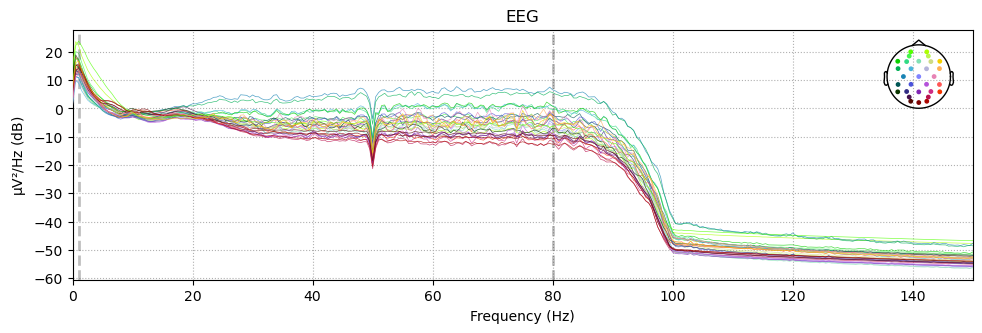

In [17]:
%matplotlib inline
raw.filter(1, 80, None,l_trans_bandwidth='auto',filter_length='auto',phase='zero') #Filtering between 1 and 100 Hz
raw.notch_filter(freqs=50)#In this experiment 50Hz for all participants so notch filter needed
raw.plot_psd(tmin=200, fmax=150, picks='eeg');#rechecking frequency decomposition
plt.show()

In [8]:
raw.save(EEG_data_path+"/pre_rejection_%s.fif"%subject_name,overwrite=True) #save data in .fif format

Writing /Users/jager/David MSc Project Analysis/Subject Data/S6/pre_rejection_s6.fif


/var/folders/78/y067h6615hj5g0k136z_sp840000gn/T/ipykernel_1956/3769798247.py:1: RuntimeWarning: This filename (/Users/jager/David MSc Project Analysis/Subject Data/S6/pre_rejection_s6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_data_path+"/pre_rejection_%s.fif"%subject_name,overwrite=True) #save data in .fif format


Closing /Users/jager/David MSc Project Analysis/Subject Data/S6/pre_rejection_s6.fif
[done]


In [9]:
raw = mne.io.read_raw_fif(EEG_data_path+"/pre_rejection_%s.fif"%subject_name, preload=True) #Load data if needed

Opening raw data file ./Subject Data/S6/pre_rejection_s6.fif...
    Range : 0 ... 3170303 =      0.000 ...  3095.999 secs
Ready.
Reading 0 ... 3170303  =      0.000 ...  3095.999 secs...


/var/folders/78/y067h6615hj5g0k136z_sp840000gn/T/ipykernel_1956/1276718167.py:1: RuntimeWarning: This filename (./Subject Data/S6/pre_rejection_s6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(EEG_data_path+"/pre_rejection_%s.fif"%subject_name, preload=True) #Load data if needed


In [18]:
events = mne.find_events(raw)#In MNE for Biosemi the trigger is automatically found

Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
273 events found
Event IDs: [11 12 13 19 21 22 23 29 30 31 32 80 81 83]


/var/folders/78/y067h6615hj5g0k136z_sp840000gn/T/ipykernel_5276/4186682001.py:1: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events);


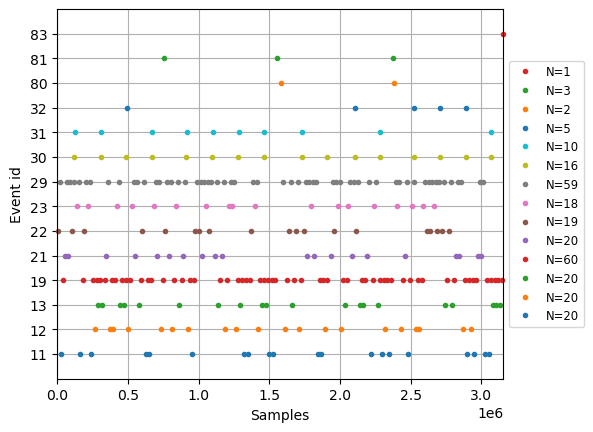

In [19]:
mne.viz.plot_events(events);

In [20]:
all_events = np.array(np.unique(events[:,2]))
stim_trigger = all_events[all_events<30]
stim_trigger = stim_trigger[stim_trigger>10]
stim_trigger = stim_trigger[stim_trigger!=19]
stim_trigger = stim_trigger[stim_trigger!=29]
conditions_to_trigger = all_events[(all_events==11) | (all_events==12) | (all_events==13) | (all_events==21) | (all_events==22) | (all_events==23)]
resp_trigger = [19,29]

In [21]:
stim_trigger

array([11, 12, 13, 21, 22, 23])

In [22]:
stim = np.array([x for x in events if x[-1] in  stim_trigger])
resp = np.array([x for x in events if x[-1] in  resp_trigger])

color_dict = {k:'b' for k in stim_trigger}
color_dict.update({k:'g' for k in resp_trigger})
color_dict.update({k:'gray' for k in set.difference(set(all_events),set(stim_trigger), set(resp_trigger))})

In [23]:
color_dict

{11: 'b',
 12: 'b',
 13: 'b',
 21: 'b',
 22: 'b',
 23: 'b',
 19: 'g',
 29: 'g',
 32: 'gray',
 80: 'gray',
 81: 'gray',
 83: 'gray',
 30: 'gray',
 31: 'gray'}

In [24]:
sfreq = 1024

# Convert 600ms to sample rates.
shift_samples = int(0.6 * sfreq)
stimulus_ids = [11, 12, 13, 21, 22, 23]


# Shift the stimulus onset events by 600ms.
shifted_events = events.copy()
for event_id in stimulus_ids:
    mask = events[:, 2] == event_id
    shifted_events[mask, 0] += shift_samples


# Create a list that will store ALL events (post-shift)
# Add original non-stimulus events to the new_shifted_events list
new_shifted_events = []
for event in shifted_events:
    if event[2] not in stimulus_ids:
        new_shifted_events.append(event)

        
# Split the one 14s trial into 4 shifted sub-trials.
# Add it into the list.
sub_trial_duration_samples = int(2.5 * sfreq)  # Was initially 3.5s in samples. | Should be 2.9s!! (3.5-0.6=2.9s),.
for event_id in stimulus_ids:
    mask = shifted_events[:, 2] == event_id
    for event in shifted_events[mask]:
        start_sample = event[0]
        for i in range(4):
            sub_trial_start = start_sample + i * sub_trial_duration_samples
            new_shifted_events.append([sub_trial_start, 0, event_id])

            
# Convert new_shifted_events to numpy array.
# Sort it by sample number to ensure order is preserved correctly.
new_shifted_events = np.array(new_shifted_events)
new_shifted_events = new_shifted_events[new_shifted_events[:, 0].argsort()]
events = new_shifted_events


print(new_shifted_events)


[[   5465       0      22]
 [   8025       0      22]
 [  10585       0      22]
 ...
 [3138385       0      13]
 [3144448       0      19]
 [3155206       0      83]]


In [25]:
start_triggers = [11, 12, 13, 21, 22, 23]
end_triggers = [19, 29]
start_events = np.array([ev for ev in events if ev[2] in start_triggers])
end_events = np.array([ev for ev in events if ev[2] in end_triggers])

onset_breaks = []
duration_breaks = []
offset_time = 0.75  # In seconds.


# Iterate over each end event to find the subsequent start event.
for end_event in end_events:
    subsequent_start_indices = np.where(start_events[:, 0] > end_event[0])[0]
    if len(subsequent_start_indices) > 0:
        subsequent_start_event = start_events[subsequent_start_indices[0]]
        # Calculate the time difference between those events.
        # Check if it exceeds the 3 second threshold.
        time_diff = (subsequent_start_event[0] - end_event[0]) / raw.info['sfreq']
        if time_diff > 3:
            # Adjust onset and duration to include offsets.
            # Check that the duration is not negative post-adjustment.
            adjusted_onset = (end_event[0] / raw.info['sfreq']) + offset_time
            adjusted_duration = time_diff - (2 * offset_time)
            if adjusted_duration > 0:
                onset_breaks.append(adjusted_onset)
                duration_breaks.append(adjusted_duration)

                
# Create annotations for the breaks.
break_annotations = mne.Annotations(onset=onset_breaks,
                                    duration=duration_breaks,
                                    description=['BAD_break'] * len(onset_breaks))
raw.set_annotations(break_annotations)
print(raw.annotations)


<Annotations | 118 segments: BAD_break (118)>


In [26]:
%matplotlib qt
if 'saved_annotations_%s.csv'%(subject_name) in os.listdir('./'):
    annot_from_file = mne.read_annotations('saved_annotations_%s.csv'%(subject_name))
    raw.set_annotations(annot_from_file)
    raw.plot(events=events,  event_color=color_dict, remove_dc=True, n_channels=len(raw.ch_names), use_opengl=True, block=True)
    raw.annotations.save('saved_annotations_%s.csv'%(subject_name),overwrite=True)
else:
    raw.plot(events=events,  event_color=color_dict, remove_dc=True, n_channels=len(raw.ch_names), use_opengl=True, block=True)
    raw.annotations.save('saved_annotations_%s.csv'%(subject_name),overwrite=True)


Using pyopengl with version 3.1.6
Channels marked as bad:
['T7', 'T8']
Overwriting existing file.


In [19]:
raw.save(EEG_data_path+"/pre_ica_%s.fif"%subject_name,overwrite=True)

Writing /Users/jager/David MSc Project Analysis/Subject Data/S6/pre_ica_s6.fif


/var/folders/78/y067h6615hj5g0k136z_sp840000gn/T/ipykernel_1956/2185061506.py:1: RuntimeWarning: This filename (/Users/jager/David MSc Project Analysis/Subject Data/S6/pre_ica_s6.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(EEG_data_path+"/pre_ica_%s.fif"%subject_name,overwrite=True)


Closing /Users/jager/David MSc Project Analysis/Subject Data/S6/pre_ica_s6.fif
[done]


In [20]:
raw, events = raw.resample(512, events=events)

In [21]:
all_events = np.array(np.unique(events[:,2]))
stim_trigger = all_events[all_events<30]
stim_trigger = stim_trigger[stim_trigger>10]
stim_trigger = stim_trigger[stim_trigger!=19]
stim_trigger = stim_trigger[stim_trigger!=29]
conditions_to_trigger = all_events[(all_events==11) | (all_events==12) | (all_events==13) | (all_events==21) | (all_events==22) | (all_events==23)]
resp_trigger = [19,29]

In [22]:
ica = mne.preprocessing.ICA(n_components = len(raw.pick_types(eeg=True).ch_names)-1, method='fastica', max_iter='auto')
ica.fit(raw)

Fitting ICA to data using 31 channels (please be patient, this may take a while)
Omitting 676360 of 1585152 (42.67%) samples, retaining 908792 (57.33%) samples.
Selecting by number: 30 components
Fitting ICA took 17.7s.


Method,fastica
Fit,73 iterations on raw data (908792 samples)
ICA components,30
Available PCA components,31
Channel types,eeg
ICA components marked for exclusion,—


In [23]:
ica.save(EEG_data_path+"/ICA_object_%s.fif"%subject_name, overwrite=True);

Writing ICA solution to /Users/jager/David MSc Project Analysis/Subject Data/S6/ICA_object_s6.fif...


/var/folders/78/y067h6615hj5g0k136z_sp840000gn/T/ipykernel_1956/188950767.py:1: RuntimeWarning: This filename (./Subject Data/S6/ICA_object_s6.fif) does not conform to MNE naming conventions. All ICA files should end with -ica.fif, -ica.fif.gz, _ica.fif or _ica.fif.gz
  ica.save(EEG_data_path+"/ICA_object_%s.fif"%subject_name, overwrite=True);


In [24]:
stim = np.array([x for x in events if x[-1] in  stim_trigger])
resp = np.array([x for x in events if x[-1] in  resp_trigger])

color_dict = {k:'b' for k in stim_trigger}
color_dict.update({k:'g' for k in resp_trigger})
color_dict.update({k:'gray' for k in set.difference(set(all_events),set(stim_trigger), set(resp_trigger))})
epochs = mne.Epochs(raw, stim, event_id=[int(x) for x in stim_trigger], baseline=None, tmin=-0.2, tmax=2.5, preload=True)

Not setting metadata
468 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 468 events and 1383 original time points ...
0 bad epochs dropped


In [25]:
%matplotlib qt
ica.plot_components(inst=epochs)

[<MNEFigure size 1950x1832 with 20 Axes>,
 <MNEFigure size 1950x992 with 10 Axes>]

In [26]:
print(epochs.event_id)
print({event: len(epochs[event]) for event in epochs.event_id})

{'11': 11, '12': 12, '13': 13, '21': 21, '22': 22, '23': 23}
{'11': 80, '12': 80, '13': 80, '21': 80, '22': 76, '23': 72}


Not setting metadata
468 matching events found
No baseline correction applied
0 projection items activated
You set the browser-backend to "qt" but your current version 0.0.0 of mne-qt-browser is too low for ICA.Update with pip or conda.Defaults to matplotlib.
Using matplotlib as 2D backend.
Using qt as 2D backend.


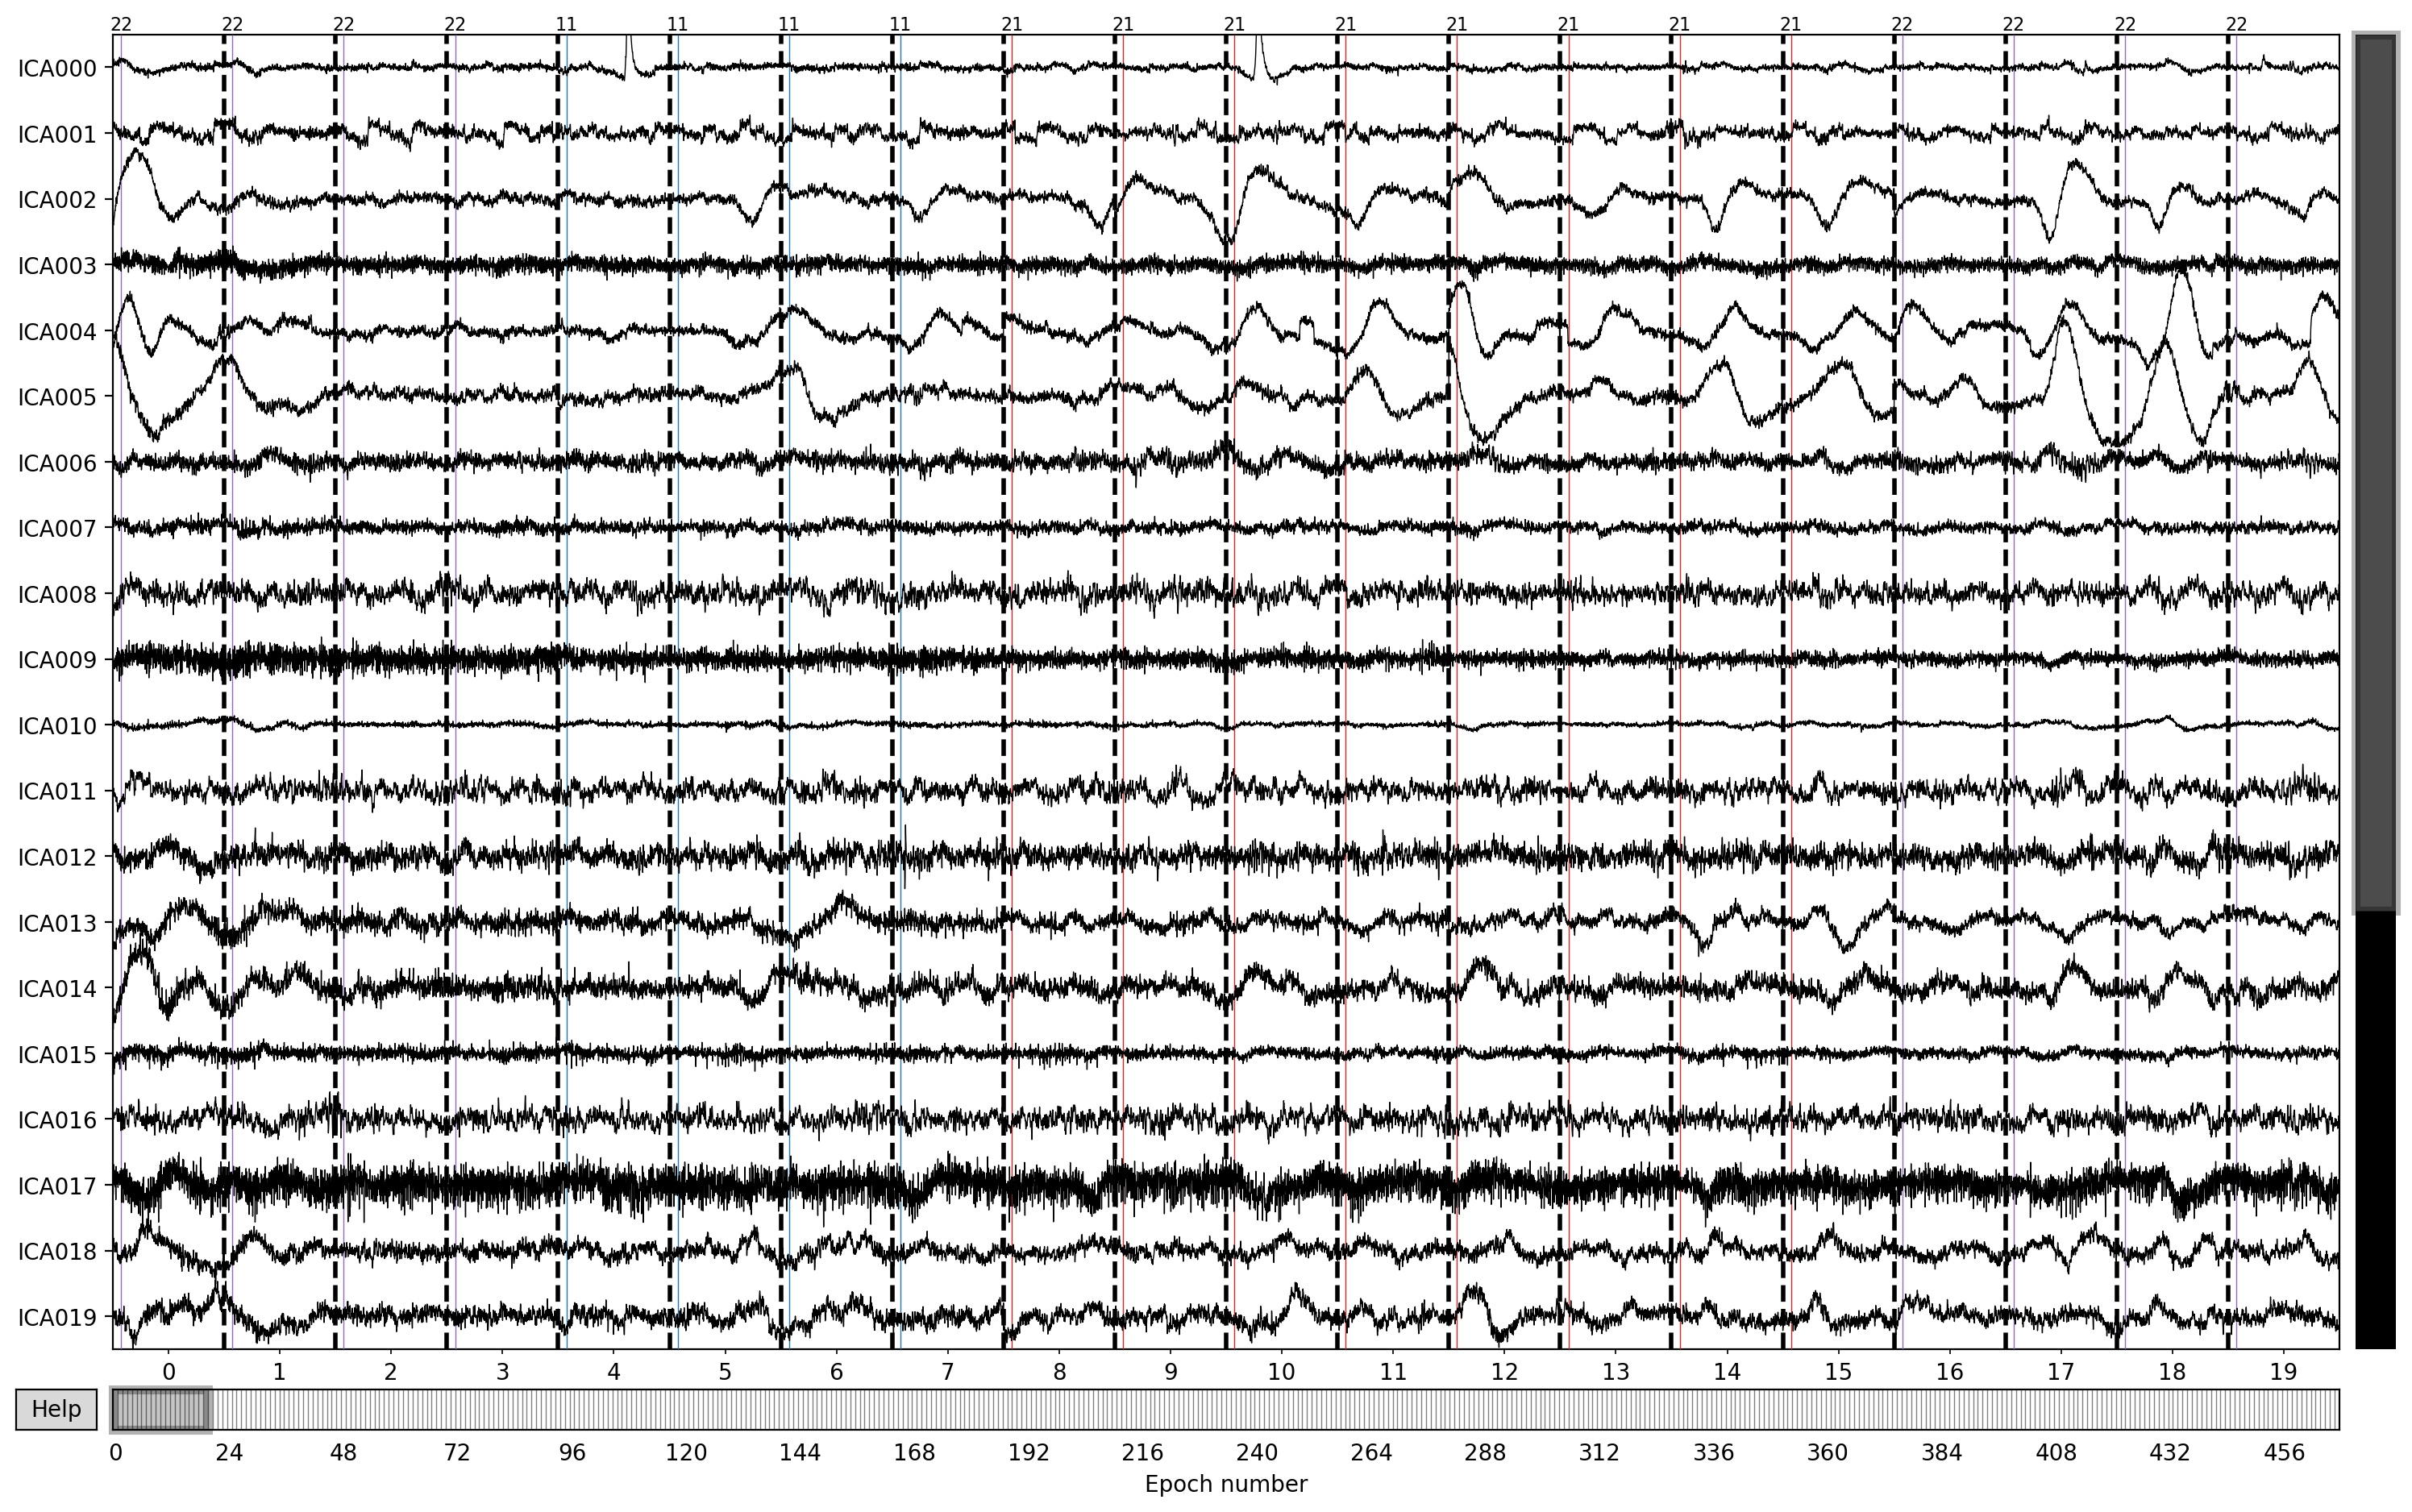

In [27]:
ica.plot_sources(epochs, block=True)

[0, 2, 5]
Applying ICA to Evoked instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 31 PCA components


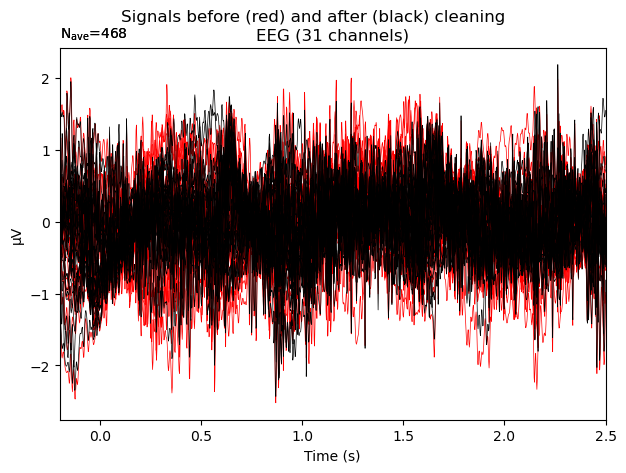

In [28]:
%matplotlib inline 
print(ica.exclude)
ica.plot_overlay(epochs.average(), exclude=ica.exclude, picks='eeg');

In [29]:
# raw = mne.io.read_raw_fif(EEG_data_path+"/pre_ica_%s.fif"%subject_name, preload=True)
ica.apply(raw)


Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 3 ICA components
    Projecting back using 31 PCA components


<Raw | pre_rejection_s6.fif, 31 x 1585152 (3096.0 s), ~375.0 MB, data loaded>

[]
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Setting 676360 of 1585152 (42.67%) samples to NaN, retaining 908792 (57.33%) samples.
Effective window size : 4.000 (s)


/var/folders/78/y067h6615hj5g0k136z_sp840000gn/T/ipykernel_1956/4009834760.py:2: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw = raw.interpolate_bads()
/Users/jager/opt/miniforge3/envs/mne/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


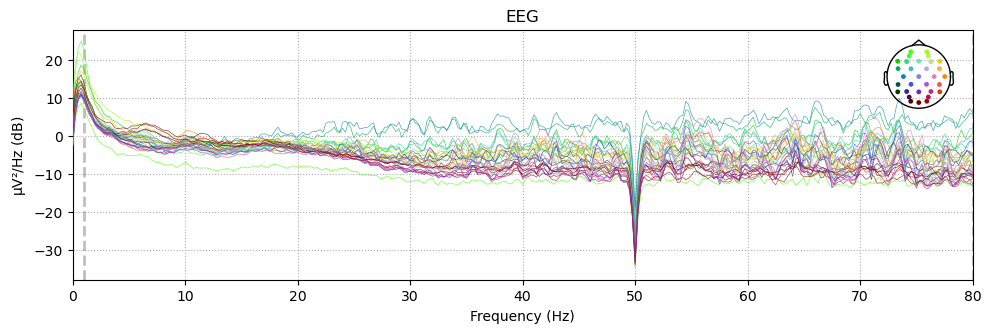

In [30]:
print(raw.info['bads'])
raw = raw.interpolate_bads()
raw.info['bads']
raw.plot_psd(fmax=80);


In [31]:
raw, events = raw.resample(256, events=events)

all_events = np.array(np.unique(events[:,2]))
stim_trigger = all_events[all_events<30]
stim_trigger = stim_trigger[stim_trigger>10]
stim_trigger = stim_trigger[stim_trigger!=19]
stim_trigger = stim_trigger[stim_trigger!=29]
conditions_to_trigger = all_events[(all_events==11) | (all_events==12) | (all_events==13) | (all_events==21) | (all_events==22) | (all_events==23)]
resp_trigger = [19,29]

stim = np.array([x for x in events if x[-1] in  stim_trigger])
resp = np.array([x for x in events if x[-1] in  resp_trigger])

color_dict = {k:'b' for k in stim_trigger}
color_dict.update({k:'g' for k in resp_trigger})
color_dict.update({k:'gray' for k in set.difference(set(all_events),set(stim_trigger), set(resp_trigger))})
epochs = mne.Epochs(raw, stim, event_id=[int(x) for x in stim_trigger], baseline=None, tmin=-0.2, tmax=2.5, preload=True)

Not setting metadata
468 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 468 events and 692 original time points ...
0 bad epochs dropped


In [32]:
import autoreject #version 0.3.1 https://autoreject.github.io/
ar = autoreject.AutoReject(consensus=np.linspace(0, .5, 11), n_jobs=-1) #I constrain the consensus parameter to be <=.5 as trials with more than half bad chan should be rejected
ar.fit(epochs)  # fit on the first 20 epochs to save time
epochs_ar, reject_log = ar.transform(epochs, return_log=True)

Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/31 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/31 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/468 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/468 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/468 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/468 [00:00<?,       ?it/s]

/Users/jager/opt/miniforge3/envs/mne/lib/python3.9/site-packages/mne/bem.py:1119: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
/Users/jager/opt/miniforge3/envs/mne/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jager/opt/miniforge3/envs/mne/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jager/opt/miniforge3/envs/mne/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.35 and n_interpolate=4


  0%|          | Repairing epochs : 0/468 [00:00<?,       ?it/s]

Dropped 76 epochs: 0, 10, 11, 12, 18, 20, 21, 23, 48, 49, 50, 52, 53, 54, 55, 58, 81, 82, 83, 89, 90, 94, 116, 117, 118, 119, 120, 128, 129, 147, 171, 207, 228, 229, 230, 231, 236, 237, 238, 240, 241, 242, 252, 253, 254, 255, 256, 257, 260, 265, 268, 269, 270, 285, 286, 287, 288, 289, 290, 292, 293, 304, 307, 313, 314, 315, 343, 352, 353, 357, 359, 404, 406, 407, 451, 465


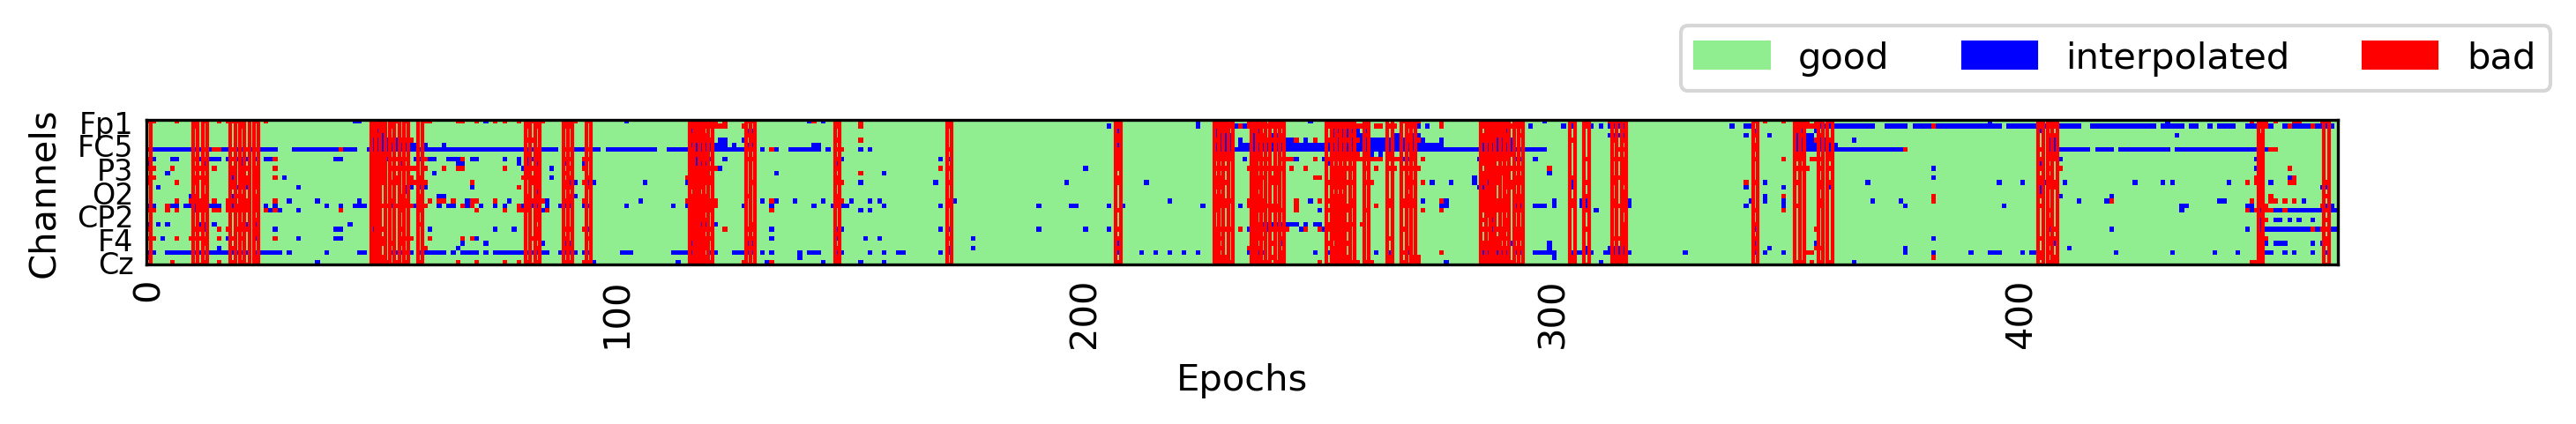

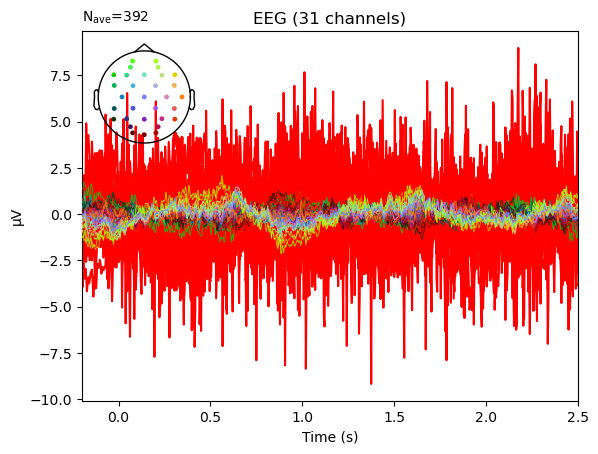

In [33]:
%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(10,20), dpi=300)
reject_log.plot('horizontal', ax=ax)
plt.show()
evoked_bad = epochs[reject_log.bad_epochs].average()
plt.figure()
plt.plot(evoked_bad.times, evoked_bad.data.T * 1e6, 'r', zorder=-1)
epochs_ar.average().plot(axes=plt.gca());#Compare ERP of rejected vs not rejected

In [34]:
print(epochs.event_id)
print({event: len(epochs[event]) for event in epochs.event_id})

{'11': 11, '12': 12, '13': 13, '21': 21, '22': 22, '23': 23}
{'11': 80, '12': 80, '13': 80, '21': 80, '22': 76, '23': 72}


In [35]:
epochs

Number of events,468
Events,11: 8012: 8013: 8021: 8022: 7623: 72
Time range,-0.199 – 2.500 sec
Baseline,off


In [36]:
epochs_ar

Number of events,392
Events,11: 7212: 7013: 7121: 6422: 5823: 57
Time range,-0.199 – 2.500 sec
Baseline,off


In [37]:
epochs_ar.save(EEG_data_path+'/%s_ar_epo.fif'%subject_name, overwrite=True)